In [11]:
import pandas as pd, numpy as np, json, os
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
plt.style.use('seaborn-whitegrid')
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [13]:
#!pip install d3IpyPlus
from d3IpyPlus import ScatterPlot, LinePlot, BarPlot, StackedArea

In [14]:
#!pip install pyecharts

In [15]:
m=json.loads(open('ignore/member_timelines.json','r').read())
members=json.loads(open('ignore/member_simple.json','r').read())

In [16]:
d=pd.DataFrame(members['deaths'],index=['v']).T

In [17]:
d['v']=' †'

In [18]:
s=pd.DataFrame(members['s2'],index=['s']).T
s=s.join(d)
s['v']=s['v'].fillna('')
s['s']=s['s']+s['v']
s=s[['s']]
s['w']=s['s'].str.split(' ').str[0].str[0]+s['s'].str.split(' ').str[-1].str[0]

In [19]:
p=pd.DataFrame(members['part'],index=['Part ']).T
p.head()

,Part
Zofota Severin | 1933-03-28,⚪️ FSN - Frontul Salvării Naţionale
Comisel Constanta | 1934-04-30,⚪️ FSN - Frontul Salvării Naţionale
Capatina Octavian-Dan | 1948-04-17,🕊️ PUNR - Partidul Unităţii Naţionale Române
Bangu Corvin-Laurentiu | Ismeretlen,⚪️ FSN - Frontul Salvării Naţionale
Rosculet Radu Voicu | 1939-10-24,📐 PNL - Partidul Naţional Liberal


In [20]:
szd_color='#E91C62'

In [21]:
pcolors=json.loads(open('json/pcolors.json','r').read())
p['Color']=p['Part '].str.split(' ').str[1].str.strip()
p['Part  ']=p['Part '].str.split('-').str[0].str.strip()
p=p.join(pd.DataFrame(pcolors,index=['cvalue']).T,on='Color')

In [22]:
g=pd.DataFrame(members['megye'],index=['Megye ']).T
g.head()

,Megye
Arama Viorel | 1938-03-10,🇷🇴 Bákó
Pop Petru | 1939-03-01,🇷🇴 Argeș
Les Ioan | 1947-09-01,🇷🇴 Szeben
Carp Mihai | 1956-05-20,🇷🇴 Bihar
Craciun Gheorghe | 1954-12-13,🇷🇴 Olt


In [ ]:
def replace_all(text, dic):
    for i in dic:
        text = text.replace(i, dic[i])
    return text

In [23]:
data={'Ország':{},'Bizottság':{},'Párt':{},'Megye':{}}
attention={}
for k,i in enumerate(m):
    if k%1000==0: print(k/len(m)*100,'%')
    name=i['Simple']
    if i['Típus'] in list(data.keys()):
        if i['Csoportok'] not in data[i['Típus']]:data[i['Típus']][i['Csoportok']]={}
        for t in pd.date_range(i['start'],i['end']):
            st=str(t)[:10]
            if st not in data[i['Típus']][i['Csoportok']]:data[i['Típus']][i['Csoportok']][st]=set()
            data[i['Típus']][i['Csoportok']][st].add(name)            
            if name not in attention:attention[name]={}
            if st not in attention[name]:attention[name][st]=0
            attention[name][st]+=1

0.0 %
2.9080757262919126 %


KeyboardInterrupt: 

In [260]:
df=pd.DataFrame(attention)

In [261]:
pd.to_datetime('2019-07-01')-pd.to_datetime('2018-01-24')

Timedelta('523 days 00:00:00')

In [262]:
counts=df.count().sort_values(ascending=False)

In [263]:
counts.head(7)

Marton Arpad-Francisc | 1955-03-25        10556
Verestoy Attila | 1954-03-01              10040
Dumitrescu Cristian-Sorin | 1955-04-24     9711
Seres Denes | 1953-07-21                   9711
Nicolicea Eugen | 1956-06-06               9704
Marko Bela | 1951-09-08                    9641
Kerekes Karoly | 1947-12-14                9634
dtype: int64

In [264]:
counts2=df.max().sort_values(ascending=False)

In [265]:
counts2={}
for i in df.columns:
    counts2[i]=df[i].last_valid_index()
counts2=pd.DataFrame(counts2,index=[0]).T[0]

In [266]:
counts2.head(7)

Fador Angelica | 1977-10-15     2019-07-01
Ivan Gheorghe | 1943-10-15      1992-05-12
Pescaru Valeriu | 1934-11-29    1992-10-16
Varga Attila | 1963-04-21       2012-12-20
Sarb Gheorghe | 1955-01-19      2008-12-13
Rosca Ioan | 1921-03-10         2000-11-30
Timen Iosef | 1927-02-10        1992-10-16
Name: 0, dtype: object

In [267]:
min_time=365*6
min_time1=365*4
min_dep=2

In [268]:
de=pd.DataFrame(counts).join(p)
de=de[de[0]>min_time1]
dd=de.groupby('Part ').nunique()
de=de.groupby('Part ').mean()
de=np.round(de.loc[dd[dd[0]>min_dep].index]/365,1)
de.columns=['Atlagos regiseg']
de=de.join(p.set_index('Part ').drop_duplicates())
dj=de.groupby(['Part  ','cvalue']).mean().reset_index().sort_values(by='Atlagos regiseg', ascending=False)

In [269]:
de

,Atlagos regiseg,Color,Part,cvalue
Part,,,,
✳️ PNTCD - Partidul Naţional Ţărănesc Creştin Democrat,5.3,PNTCD,✳️ PNTCD,#04843c
🌷 RMDSZ - Romániai Magyar Demokrata Szövetség,10.0,RMDSZ,🌷 RMDSZ,green
🌹 PDSR - Partidul Democraţiei Sociale din România,5.3,PDSR,🌹 PDSR,#dc2c24
🌹 PSD - Partidul Social Democrat,9.0,PSD,🌹 PSD,#dc2c24
🌹 PSDR - Partidul Social Democrat Român,6.3,PSDR,🌹 PSDR,#dc2c24
🌹 PSM - Partidul Socialist al Muncii,4.3,PSM,🌹 PSM,#dc2c24
🍀 PER - Partidul Ecologist Român,7.2,PER,🍀 PER,#69a54f
🍏 PMP - Partidul Mişcarea Populară,8.3,PMP,🍏 PMP,#0484cc
👤 Independent - Independent,6.4,Independent,👤 Independent,#555


In [270]:
sample_data = list(de.reset_index().T.to_dict().values())
scplot = BarPlot(
    x='Part  ', 
    y={'value':'Atlagos regiseg','label':'Atlagos regiseg (ev)'}, 
    id='Part  ', 
    aggs={'Atlagos regiseg':'mean'},
    text=' ', 
    color='cvalue', 
    order={'value':'Atlagos regiseg','sort':'desc'},
    tooltip=['Part '], 
    legend=False, 
    width='100%', 
)
scplot.draw(sample_data)
scplot.height='100%'
open('time1.html','w').write(scplot.dump_html(sample_data))

<IPython.core.display.Javascript object>

3893

In [271]:
from IPython.display import IFrame

In [272]:
from pyecharts.charts import Bar, Grid
from pyecharts import options as opts
#docs https://pyecharts.org/#/en-us/

In [273]:
bar = (
    Bar(
        init_opts=opts.InitOpts(
            width='100%',
            height='410px'
        )
    )
    .add_xaxis(list(dj['Part  '].values))
    .add_yaxis('Átlagos régiség',
               [opts.BarItem(
                   name=i[1]['Part  '],
                   value=np.round(i[1]['Atlagos regiseg'],1),
                   itemstyle_opts=opts.ItemStyleOpts(color=i[1]['cvalue']),
                ) for i in dj.T.iteritems()]
              )
    .set_global_opts(
        legend_opts=opts.LegendOpts(is_show=False),
        title_opts=opts.TitleOpts(
            title="Parlamenterek átlagos régisége",
            pos_left='center',
            pos_top='20'
        ),
        xaxis_opts=opts.AxisOpts(
            type_='category',
            axislabel_opts =opts.LabelOpts(
                rotate=-50,
                font_weight='normal'
            )
        ),
#         graphic_opts=[
#                 opts.GraphicImage(
#                     graphic_item=opts.GraphicItem(
#                         id_="logo",
#                         right=50,
#                         top=50,
#                         z=-10,
#                         bounding="raw",
#                         origin=[75, 75],
#                     ),
#                     graphic_imagestyle_opts=opts.GraphicImageStyleOpts(
#                         image="https://szekelydata.csaladen.es/favicon.ico",
#                         width=25,
#                         height=25,
#                         opacity=0.8,
#                     ),
#                 )
#             ],
    )
    .set_series_opts(
        label_opts=opts.LabelOpts(
        )
    )
    .render('time1e.html')
)
IFrame(src='time1e.html', width='98%', height=440)

In [274]:
from plotly import offline as po
import plotly.plotly as py
import plotly.graph_objs as go

trace0 = go.Bar(
    x=list(dj['Part  '].values),
    y=np.round(np.array(dj['Atlagos regiseg'].values),1),
    marker=dict(
        color=list(dj['cvalue'].values)
    ),
)

data = [trace0]

fig = go.Figure(data=data)
file_name='time1c.html'
po.plot(fig, filename=file_name, auto_open=False);
IFrame(src=file_name, width='98%', height=420)

In [275]:
de=pd.DataFrame(counts).join(g)
de=de[de[0]>min_time1]
dd=de.groupby('Megye ').nunique()
de=de.groupby('Megye ').mean()
de=np.round(de.loc[dd[dd[0]>min_dep].index]/365,1)
de.columns=['Atlagos regiseg']
dj=de.groupby(['Megye ']).mean().reset_index().sort_values(by='Atlagos regiseg', ascending=False)

In [276]:
ro_shape=json.loads(open('json/romania-counties.json','r').read())
megyek=json.loads(open('C:/users/csala/Onedrive/Github/universal/ro/hun_megyek.json','r').read())
megye_map={}
for i,di in enumerate(ro_shape['objects']['ROU_adm1']['geometries']):
    if (di['properties']['VARNAME_1']):
        megye_map[i]=di['properties']['VARNAME_1']
    else:
        megye_map[i]=di['properties']['NAME_1']
megye_map={megyek[megye_map[i]]:i for i in megye_map}
dj['id']=[megye_map[i]  if i in megye_map else -1 for i in dj['Megye '].str.split(' ').str[1].values]
open('json/megye_map.json','w').write(json.dumps(list(dj.T.to_dict().values())))

3629

In [277]:
sample_data = list(de.reset_index().T.to_dict().values())
scplot = BarPlot(
    x='Megye ', 
    y={'value':'Atlagos regiseg','label':'Atlagos regiseg (ev)'}, 
    id='Megye ', 
    aggs={'Atlagos regiseg':'mean'},
    text=' ', 
#     color='cvalue', 
    order={'value':'Atlagos regiseg','sort':'desc'},
#     tooltip=['Part '], 
    legend=False, 
    width='100%',    
)
scplot.draw(sample_data)
scplot.height='100%'
open('time2.html','w').write(scplot.dump_html(sample_data))

<IPython.core.display.Javascript object>

4093

In [278]:
bar = (
    Bar(
        init_opts=opts.InitOpts(
            width='100%',
            height='410px'
        )
    )
    .add_xaxis(list(dj['Megye '].values))
    .add_yaxis('Átlagos régiség',
               [opts.BarItem(
                   name=i[1]['Megye '],
                   value=np.round(i[1]['Atlagos regiseg'],1),
                   itemstyle_opts=opts.ItemStyleOpts(color=szd_color),
                ) for i in dj.T.iteritems()]
              )
    .set_global_opts(
        legend_opts=opts.LegendOpts(is_show=False),
        xaxis_opts=opts.AxisOpts(
            type_='category',
            axislabel_opts =opts.LabelOpts(
                rotate=-90,
                font_weight='normal'
            ),
#             offset=0
            
        ),
#         graphic_opts=[
#                 opts.GraphicImage(
#                     graphic_item=opts.GraphicItem(
#                         id_="logo",
#                         right=50,
#                         top=50,
#                         z=-10,
#                         bounding="raw",
#                         origin=[75, 75],
#                     ),
#                     graphic_imagestyle_opts=opts.GraphicImageStyleOpts(
#                         image="https://szekelydata.csaladen.es/favicon.ico",
#                         width=25,
#                         height=25,
#                         opacity=0.8,
#                     ),
#                 )
#             ],
    )
    .set_series_opts(
        label_opts=opts.LabelOpts(
        )
    )
    .render('time2e.html')
)
IFrame(src='time2e.html', width='98%', height=440)

In [279]:
from plotly import offline as po
import plotly.plotly as py
import plotly.graph_objs as go

trace0 = go.Bar(
    x=list(dj['Megye '].values),
    y=np.round(np.array(dj['Atlagos regiseg'].values),1)
)

data = [trace0]

fig = go.Figure(data=data)
file_name='time2c.html'
po.plot(fig, filename=file_name, auto_open=False);
IFrame(src=file_name, width='98%', height=420)

In [280]:
de=pd.DataFrame(counts2).join(p).join(d)
de=de.reset_index()
de=de[[str(i)=='nan' for i in list(de['v'].values)]] #keep only alive ones
de['szul']=de['index'].str.split('|').str[1].str.strip()
de=de[[str(i)!='Ismeretlen' for i in list(de['szul'].values)]] #keep only known birth dates
de['Eletkor']=(pd.to_datetime(de[0])-pd.to_datetime(de['szul'])).dt.days/365
dd=de.groupby('Part ').nunique()
de=de.groupby('Part ').mean()[['Eletkor']]
de=np.round(de.loc[dd[dd[0]>min_dep].index],0)
de.columns=['Atlagos eletkor']
de=de.join(p.set_index('Part ').drop_duplicates())
dj=de.groupby(['Part  ','cvalue']).mean().reset_index().sort_values(by='Atlagos eletkor', ascending=False)

In [281]:
sample_data = list(de.reset_index().T.to_dict().values())
scplot = BarPlot(
    x='Part  ', 
    y='Atlagos eletkor', 
    id='Part  ', 
    aggs={'Atlagos eletkor':'mean'},
   text=' ', 
    color='cvalue', 
    order={'value':'Atlagos eletkor','sort':'desc'},
    tooltip=['Part '], 
    legend=False, 
    width='100%', 
)
scplot.draw(sample_data)
scplot.height='100%'
open('time3.html','w').write(scplot.dump_html(sample_data))

<IPython.core.display.Javascript object>

3840

In [282]:
from plotly import offline as po
import plotly.plotly as py
import plotly.graph_objs as go

trace0 = go.Bar(
    x=list(dj['Part  '].values),
    y=np.round(np.array(dj['Atlagos eletkor'].values),0),
    marker=dict(
        color=list(dj['cvalue'].values)
    ),
)

data = [trace0]

fig = go.Figure(data=data)
file_name='time3c.html'
po.plot(fig, filename=file_name, auto_open=False);
IFrame(src=file_name, width='98%', height=420)

In [283]:
de=pd.DataFrame(counts2).join(g).join(d)
de=de.reset_index()
de=de[[str(i)=='nan' for i in list(de['v'].values)]] #keep only alive ones
de['szul']=de['index'].str.split('|').str[1].str.strip()
de=de[[str(i)!='Ismeretlen' for i in list(de['szul'].values)]] #keep only known birth dates
de['Eletkor']=(pd.to_datetime(de[0])-pd.to_datetime(de['szul'])).dt.days/365
dd=de.groupby('Megye ').nunique()
de=de.groupby('Megye ').mean()[['Eletkor']]
de=np.round(de.loc[dd[dd[0]>min_dep].index],0)
de.columns=['Atlagos eletkor']
dj=de.groupby(['Megye ']).mean().reset_index().sort_values(by='Atlagos eletkor', ascending=False)

In [284]:
ro_shape=json.loads(open('json/romania-counties.json','r').read())
megyek=json.loads(open('C:/users/csala/Onedrive/Github/universal/ro/hun_megyek.json','r').read())
megye_map={}
for i,di in enumerate(ro_shape['objects']['ROU_adm1']['geometries']):
    if (di['properties']['VARNAME_1']):
        megye_map[i]=di['properties']['VARNAME_1']
    else:
        megye_map[i]=di['properties']['NAME_1']
megye_map={megyek[megye_map[i]]:i for i in megye_map}
dj['id']=[megye_map[i]  if i in megye_map else -1 for i in dj['Megye '].str.split(' ').str[1].values]
open('json/megye_map2.json','w').write(json.dumps(list(dj.T.to_dict().values())))

3670

In [285]:
sample_data = list(de.reset_index().T.to_dict().values())
scplot = BarPlot(
    x='Megye ', 
    y='Atlagos eletkor', 
    id='Megye ', 
    aggs={'Atlagos eletkor':'mean'},
    text=' ', 
#     color='cvalue', 
    order={'value':'Atlagos eletkor','sort':'desc'},
#     tooltip=['Part '], 
    legend=False, 
    width='100%',    
)
scplot.draw(sample_data)
scplot.height='100%'
open('time4.html','w').write(scplot.dump_html(sample_data))

<IPython.core.display.Javascript object>

4091

In [286]:
from plotly import offline as po
import plotly.plotly as py
import plotly.graph_objs as go

trace0 = go.Bar(
    x=list(dj['Megye '].values),
    y=np.round(np.array(dj['Atlagos eletkor'].values),0)
)

data = [trace0]

fig = go.Figure(data=data)
file_name='time4c.html'
po.plot(fig, filename=file_name, auto_open=False);
IFrame(src=file_name, width='98%', height=420)

Fusions

In [287]:
switches={}
fusions={}
for k,i in enumerate(m):
    if k%1000==0: print(k/len(m)*100,'%')
    name=i['Simple']
    if i['Típus'] in ['Megye','Párt']:
        for t in pd.date_range(i['start'],i['end']):
            st=str(t)[:10]
            if name not in switches:switches[name]={}
            if i['Típus']not in switches[name]:switches[name][i['Típus']]={'count':0,'current':i['Csoportok']}
            if switches[name][i['Típus']]['current']!=i['Csoportok']:
                p1=i['Csoportok']
                p2=switches[name][i['Típus']]['current']
                if i['Típus'] not in fusions:fusions[i['Típus']]={}
                if p1 not in fusions[i['Típus']]:fusions[i['Típus']][p1]={}
                if p2 not in fusions[i['Típus']][p1]:fusions[i['Típus']][p1][p2]=0
                fusions[i['Típus']][p1][p2]+=1
                switches[name][i['Típus']]['current']=str(i['Csoportok'])
                switches[name][i['Típus']]['count']+=1

0.0 %
3.302728053372085 %
6.60545610674417 %
9.908184160116255 %
13.21091221348834 %
16.513640266860428 %
19.81636832023251 %
23.1190963736046 %
26.42182442697668 %
29.72455248034877 %
33.027280533720855 %
36.33000858709294 %
39.63273664046502 %
42.93546469383711 %
46.2381927472092 %
49.540920800581276 %
52.84364885395336 %
56.14637690732545 %
59.44910496069754 %
62.751833014069625 %
66.05456106744171 %
69.35728912081379 %
72.66001717418588 %
75.96274522755796 %
79.26547328093004 %
82.56820133430213 %
85.87092938767422 %
89.1736574410463 %
92.4763854944184 %
95.77911354779047 %
99.08184160116255 %


In [288]:
def get_sub(dz,x,k=1):
    part=dz.T[x].sort_values(ascending=False)
    print(part.mean())
    print(part.head(5))
    df=pd.DataFrame(part).join(pd.DataFrame(counts)).join(s)
    df['a']=df[x]/(df[0]/k)
    df=df.replace([np.inf, -np.inf], np.nan)
    df=df[df[0]>min_time] #remove outliers
    part=df.sort_values(by='a',ascending=False)[['a','s','w']]
    return part

In [289]:
dw=pd.DataFrame({i:{j:switches[i][j]['count'] for j in switches[i]} for i in switches})
part=get_sub(dw,'Párt',365)
megye=get_sub(dw,'Megye',365)

0.5197224251278305
Timis Ioan | 1951-09-17                 6
Gradinaru Nicolae | 1953-11-05          5
Codirla Liviu | 1968-01-25              5
Iliescu Valentin Adrian | 1961-11-01    5
Ion Vasile | 1950-01-12                 5
Name: Párt, dtype: int64
0.06829802775748722
Niculescu Duvaz Bogdan Nicolae | 1948-12-14    3
Banicioiu Nicolae | 1979-03-26                 3
Mihalcescu Carmen-Ileana | 1970-05-14          3
Nicolaescu Sergiu-Florin | 1930-04-13          3
Nicolae Serban | 1968-04-05                    2
Name: Megye, dtype: int64


0.10610293643790332
0.022165929140400432


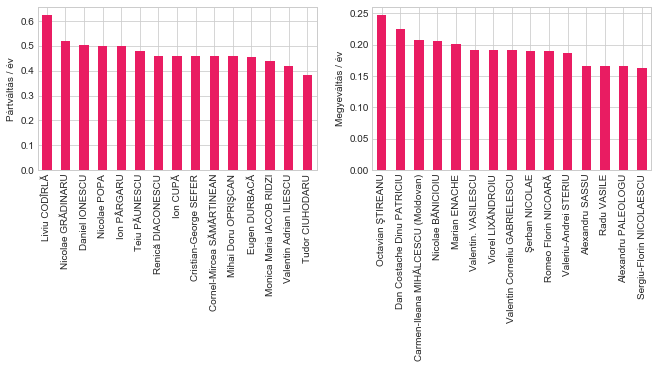

In [290]:
top=15
fig,axes=plt.subplots(1,2,figsize=(11,3))
to_plot=part.set_index('s')['a']
ax=axes[0]
print(to_plot.mean())
ax=to_plot.head(top).plot(kind='bar',ax=ax,color=szd_color)
ax.set_xlabel("")
ax.set_ylabel("Pártváltás / év")
to_plot=megye.set_index('s')['a']
ax=axes[1]
print(to_plot.mean())
to_plot.head(top).plot(kind='bar',ax=ax,color=szd_color)
ax.set_xlabel("")
ax.set_ylabel("Megyeváltás / év")
plt.savefig('fig/valtas.png',bbox_inches='tight',transparent=True)
plt.show()

Fusions

In [291]:
fusions['part']=fusions['Párt']
fusions.pop('Párt');
open('json/fusions.json','w').write(json.dumps(fusions))

14799

In [292]:
switches2={}
fusions2={}
for k,i in enumerate(m):
    if k%1000==0: print(k/len(m)*100,'%')
    name=i['Simple']
    if i['Típus'] in ['Párt']:
        if not ((i['Típus']=='Párt')and(i['Csoportok']=='👤 Independent - Independent')):        
            for t in pd.date_range(i['start'],i['end']):
                st=str(t)[:10]
                if name not in switches2:switches2[name]={}
                if i['Típus']not in switches2[name]:switches2[name][i['Típus']]={'count':0,'current':i['Csoportok']}
                if switches2[name][i['Típus']]['current']!=i['Csoportok']:
                    p1=i['Csoportok']
                    p2=switches2[name][i['Típus']]['current']
                    if i['Típus'] not in fusions2:fusions2[i['Típus']]={}
                    if p1 not in fusions2[i['Típus']]:fusions2[i['Típus']][p1]={}
                    if p2 not in fusions2[i['Típus']][p1]:fusions2[i['Típus']][p1][p2]=0
                    fusions2[i['Típus']][p1][p2]+=1
                    switches2[name][i['Típus']]['current']=str(i['Csoportok'])
                    switches2[name][i['Típus']]['count']+=1

0.0 %
3.302728053372085 %
6.60545610674417 %
9.908184160116255 %
13.21091221348834 %
16.513640266860428 %
19.81636832023251 %
23.1190963736046 %
26.42182442697668 %
29.72455248034877 %
33.027280533720855 %
36.33000858709294 %
39.63273664046502 %
42.93546469383711 %
46.2381927472092 %
49.540920800581276 %
52.84364885395336 %
56.14637690732545 %
59.44910496069754 %
62.751833014069625 %
66.05456106744171 %
69.35728912081379 %
72.66001717418588 %
75.96274522755796 %
79.26547328093004 %
82.56820133430213 %
85.87092938767422 %
89.1736574410463 %
92.4763854944184 %
95.77911354779047 %
99.08184160116255 %


In [293]:
fusions2['part']=fusions2['Párt']
fusions2.pop('Párt');
open('json/fusions2.json','w').write(json.dumps(fusions2))

7412

Orszag

In [294]:
countries={}
for k,i in enumerate(m):
    if k%1000==0: print(k/len(m)*100,'%')
    name=i['Simple']
    if i['Típus'] in ['Ország','Bizottság']:
        for t in pd.date_range(i['start'],i['end']):
            st=str(t)[:10]
            if name not in countries:countries[name]={}
            if i['Típus'] not in countries[name]:countries[name][i['Típus']]={}
            if i['Csoportok'] not in countries[name][i['Típus']]:countries[name][i['Típus']][i['Csoportok']]=0
            countries[name][i['Típus']][i['Csoportok']]+=1

0.0 %
3.302728053372085 %
6.60545610674417 %
9.908184160116255 %
13.21091221348834 %
16.513640266860428 %
19.81636832023251 %
23.1190963736046 %
26.42182442697668 %
29.72455248034877 %
33.027280533720855 %
36.33000858709294 %
39.63273664046502 %
42.93546469383711 %
46.2381927472092 %
49.540920800581276 %
52.84364885395336 %
56.14637690732545 %
59.44910496069754 %
62.751833014069625 %
66.05456106744171 %
69.35728912081379 %
72.66001717418588 %
75.96274522755796 %
79.26547328093004 %
82.56820133430213 %
85.87092938767422 %
89.1736574410463 %
92.4763854944184 %
95.77911354779047 %
99.08184160116255 %


In [295]:
dz=pd.DataFrame({i:{j:sum(countries[i][j].values()) for j in countries[i]} for i in countries}).fillna(0)
dz2=pd.DataFrame({i:{j:len(countries[i][j].values()) for j in countries[i]} for i in countries}).fillna(0)

In [296]:
orsz1=get_sub(dz2,'Ország')
biz1=get_sub(dz2,'Bizottság')

3.272760246644904
Ion Vasile | 1950-01-12               16.0
Stanciu Anghel | 1949-08-15           16.0
Kerekes Karoly | 1947-12-14           16.0
Brezniceanu Alexandru | 1941-06-19    15.0
Nistor Vasile | 1956-09-08            15.0
Name: Ország, dtype: float64
1.5865070729053319
Stroe Ionut-Marian | 1979-09-23           7.0
Borbely Laszlo | 1954-03-26               7.0
Nicoara Romeo Florin | 1972-11-12         7.0
Dumitrescu Cristian-Sorin | 1955-04-24    7.0
Vosganian Varujan | 1958-07-25            7.0
Name: Bizottság, dtype: float64


In [297]:
orsz2=get_sub(dz,'Ország')
biz2=get_sub(dz,'Bizottság')

4045.4842219804136
Peres Alexandru | 1952-12-20       26409.0
Kerekes Karoly | 1947-12-14        25555.0
Pambuccian Varujan | 1959-04-25    23128.0
Verestoy Attila | 1954-03-01       22908.0
Stanciu Anghel | 1949-08-15        22380.0
Name: Ország, dtype: float64
2018.2357635110627
Dumitrescu Cristian-Sorin | 1955-04-24    12125.0
Nicolicea Eugen | 1956-06-06              12022.0
Vosganian Varujan | 1958-07-25            11515.0
Nistor Vasile | 1956-09-08                10791.0
Verestoy Attila | 1954-03-01              10485.0
Name: Bizottság, dtype: float64


2.1424663974716127
1.0565015924931656


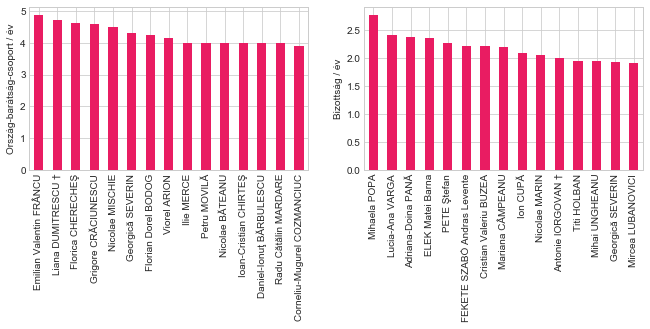

In [298]:
top=15
fig,axes=plt.subplots(1,2,figsize=(11,3))
to_plot=orsz2.set_index('s')['a']
ax=axes[0]
print(to_plot.mean())
to_plot.head(top).plot(kind='bar',ax=ax,color=szd_color)
ax.set_xlabel("")
ax.set_ylabel("Ország-barátság-csoport / év")
to_plot=biz2.set_index('s')['a']
ax=axes[1]
print(to_plot.mean())
to_plot.head(top).plot(kind='bar',ax=ax,color=szd_color)
ax.set_xlabel("")
ax.set_ylabel("Bizottság / év")
plt.savefig('fig/valtas2.png',bbox_inches='tight',transparent=True)
plt.show()

Scatter

In [299]:
part2=pd.DataFrame(part[['a','w','s']])
part2.columns=['Part','Nev','Nev2']
megye2=pd.DataFrame(megye['a'])
megye2.columns=['Megye']
sc1=part2.join(megye2).join(p).join(g).join(pd.DataFrame(counts/365,columns=['Evek']))

In [300]:
orsz3=pd.DataFrame(orsz2[['a','w','s']])
orsz3.columns=['Orszag','Nev','Nev2']
biz3=pd.DataFrame(biz2[['a']])
biz3.columns=['Bizottsag']
sc2=orsz3.join(biz3).join(p).join(g).join(pd.DataFrame(counts/365,columns=['Evek']))

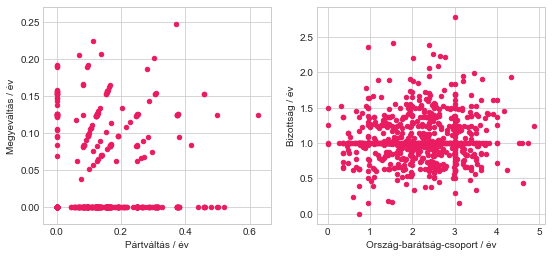

In [301]:
fig,axes=plt.subplots(1,2,figsize=(9,4))
ax=axes[0]
sc1.plot(x='Part',y='Megye',kind='scatter',ax=ax,color=szd_color)
ax.set_xlabel('Pártváltás / év')
ax.set_ylabel('Megyeváltás / év')
ax=axes[1]
sc2.plot(x='Orszag',y='Bizottsag',kind='scatter',ax=ax,color=szd_color)
ax.set_xlabel('Ország-barátság-csoport / év')
ax.set_ylabel('Bizottság / év')
plt.savefig('fig/valtas3.png',bbox_inches='tight',transparent=True)
plt.show()

In [302]:
sample_data = list(sc1.reset_index().T.to_dict().values())
scplot = ScatterPlot(x={'value':'Part','label':'Partvaltas / ev'}, 
                     y={'value':'Megye','label':'Megyevaltas / ev'}, id='index', 
                     text='Nev', 
                     color='cvalue', 
#                      order={'value':'Evek','sort':'asc'},
                     tooltip=['Nev2', 'Part  ','Megye '], 
                     legend=False, width='100%', size='Evek')
scplot.draw(sample_data)
open('scatter1b.html','w').write(scplot.dump_html(sample_data))

<IPython.core.display.Javascript object>

263128

In [303]:
sample_data = list(sc2.reset_index().T.to_dict().values())
scplot = ScatterPlot(x={'value':'Orszag','label':'Orszag-baratsag-csoport'}, 
                     y={'value':'Bizottsag','label':'Bizottsag'}, id='index', 
                     text='Nev', 
                     color='cvalue',  
#                      order={'value':'Evek','sort':'asc'},
                     tooltip=['Nev2', 'Part  ','Megye '], 
                     legend=False, width='100%', size='Evek')
scplot.draw(sample_data)
open('scatter2b.html','w').write(scplot.dump_html(sample_data))

<IPython.core.display.Javascript object>

285014